In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Set the image directory path
image_path = "/n/netscratch/ydu_lab/Lab/alex/CharXiv/images/"


In [2]:
# Get all JPG images from the directory
jpg_files = glob.glob(os.path.join(image_path, "*.jpg")) + glob.glob(os.path.join(image_path, "*.JPG"))
print(f"Found {len(jpg_files)} JPG images")

# Show first few filenames
for i, file in enumerate(jpg_files[:5]):
    print(f"{i}: {os.path.basename(file)}")


Found 2323 JPG images
0: 0.jpg
1: 1.jpg
2: 10.jpg
3: 100.jpg
4: 1000.jpg


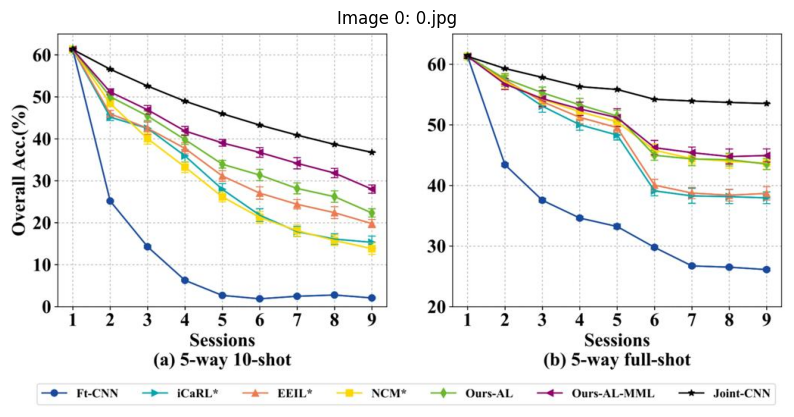

In [3]:
# Function to display a single image by index
def show_image(index):
    if 0 <= index < len(jpg_files):
        img = Image.open(jpg_files[index])
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {index}: {os.path.basename(jpg_files[index])}")
        plt.show()
    else:
        print(f"Index {index} out of range. Available: 0-{len(jpg_files)-1}")

# Example: show first image
if jpg_files:
    show_image(0)


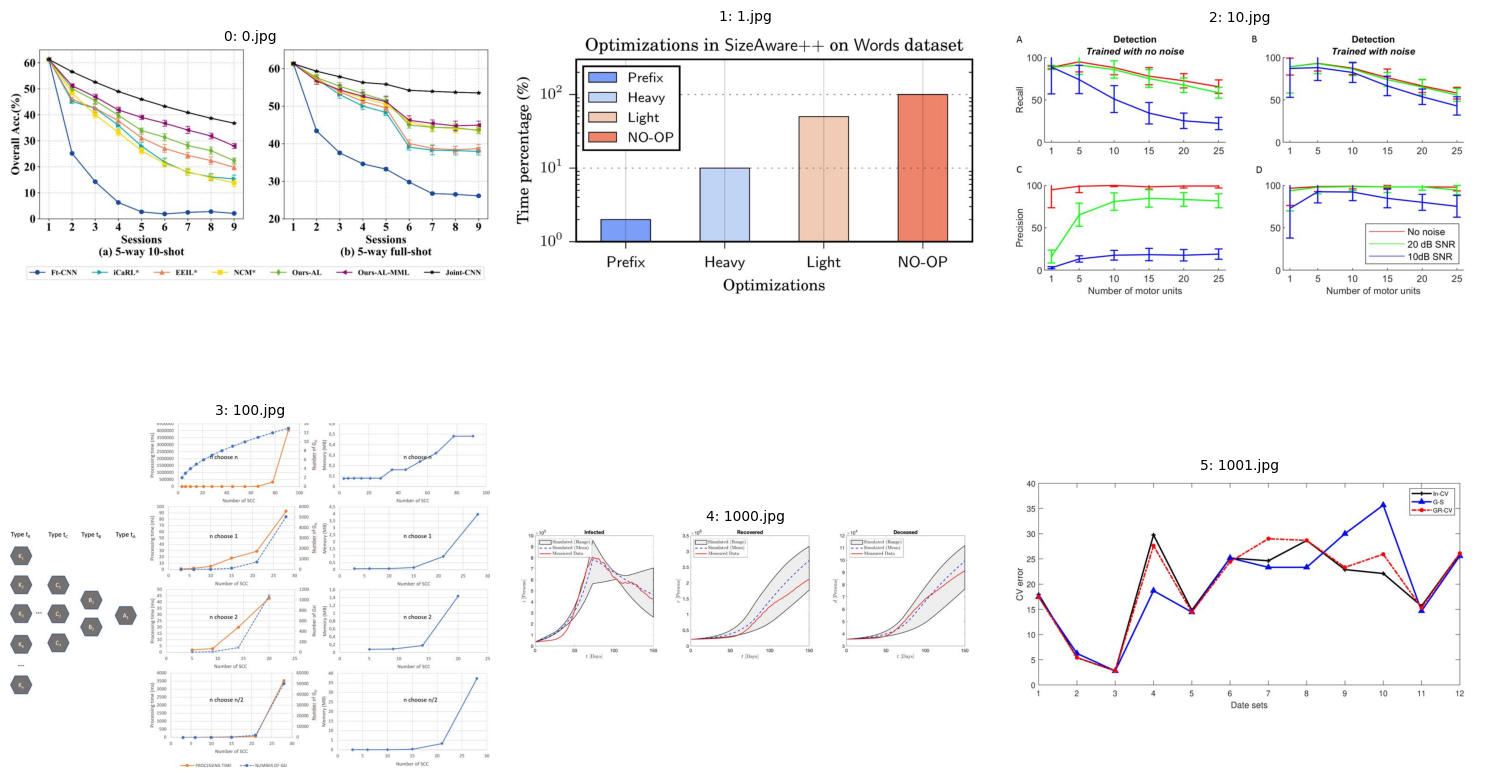

In [4]:
# Function to display multiple images in a grid
def show_images_grid(start_index=0, num_images=6, cols=3):
    if not jpg_files:
        print("No images found")
        return
    
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    
    if rows == 1:
        axes = [axes] if cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i in range(num_images):
        idx = start_index + i
        if idx >= len(jpg_files):
            break
            
        img = Image.open(jpg_files[idx])
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"{idx}: {os.path.basename(jpg_files[idx])}", fontsize=10)
    
    # Hide empty subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example: show first 6 images
if jpg_files:
    show_images_grid(0, 6)


## Usage Examples

```python
# Show a specific image by index
show_image(5)

# Show a grid of images starting from index 10
show_images_grid(start_index=10, num_images=9, cols=3)

# Browse through images in batches
for batch in range(0, min(30, len(jpg_files)), 6):
    print(f"Showing images {batch} to {batch+5}")
    show_images_grid(batch, 6)
```
